In [26]:
#%load_ext autoreload
#%autoreload 2


In [27]:
import cv2
from matplotlib import pyplot as plt
import lane_detection as ld
import lane_following as lf
import importlib

importlib.reload(ld)


<module 'lane_detection' from '/home/devashishdas/cv-intro/lane_detection.py'>

In [28]:
IP_ADDRESS = "192.168.1.102"

In [29]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()

[tcp @ 0x1032c240] Connection to tcp://192.168.1.102:8554?timeout=0 failed: No route to host
[ERROR:0@151.932] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://192.168.1.102:8554/rovcam in function 'icvExtractPattern'




In [30]:
img = cv2.imread('three_lane_frame.jpeg')
type(img)

numpy.ndarray

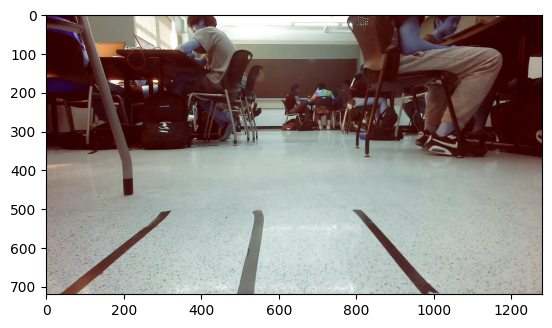

In [31]:
#lines = ld.detect_lines(img)
#lanes = ld.detect_lanes(img)
#ld.draw_lines(img, lanes)
plt.imshow(img)

In [32]:
lines = ld.detect_lines(img)
print(lines)


[[[  52  705  252  549]]

 [[ 484   77  697   77]]

 [[ 561   29  723   29]]

 [[ 822  537  970  719]]

 [[ 822  512  976  682]]

 [[ 165  200  217  362]]

 [[ 141  666  287  543]]

 [[ 550  115  732  115]]

 [[1069   57 1186    0]]

 [[ 723  276  831  289]]

 [[ 483   79  606   79]]

 [[ 803  515  968  718]]

 [[  98   79  195  379]]

 [[ 600   31  791   34]]

 [[ 364  208  533  247]]

 [[ 485  247  621  242]]

 [[ 181   91  342   91]]

 [[ 643   21  815   21]]

 [[ 501  218  617  216]]

 [[ 671   23  805   23]]

 [[ 503  304  607  302]]

 [[1139  351 1279  368]]

 [[ 436  241  555  241]]

 [[ 122   70  162  199]]

 [[ 679   78  807   78]]

 [[ 619   41  743   41]]

 [[ 137  109  181  247]]

 [[  36  719  280  528]]

 [[ 167  643  307  525]]

 [[ 537  711  562  527]]

 [[  86   32   98  134]]]


In [33]:
lanes = ld.detect_lanes(lines.tolist())

[]


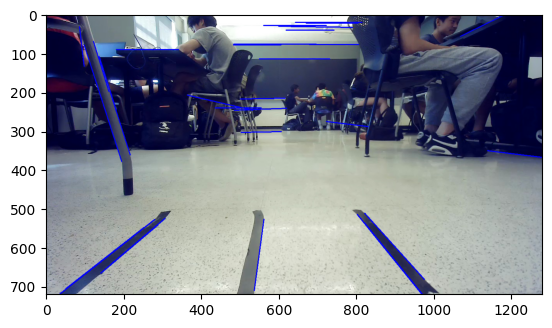

In [34]:


ld.draw_lines(img, lines)
ld.draw_lanes(img, lanes)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))